<a href="https://colab.research.google.com/github/SuzanaKstro/Passo-a-passo/blob/main/14_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install numpy pmdarima pandas requests inflection seaborn scipy matplotlib IPython scikit-learn statsmodels pmdarima tqdm statsforecast

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [4]:
df = pd.read_csv('/content/Dados Históricos - Ibovespa (2).csv')

In [5]:
df.rename(columns={'Último': 'Fechamento'}, inplace=True)

In [8]:
df.head()

,Data,Fechamento,Abertura,Máxima,Mínima,Vol.,Var%
0,30.12.2024,120.283,120.267,121.050,120.158,"8,90M","0,01%"
1,27.12.2024,120.269,121.078,121.609,120.252,"8,94M","-0,67%"
2,26.12.2024,121.078,120.767,121.612,120.428,"8,34M","0,26%"
3,23.12.2024,120.767,122.105,122.105,120.617,"9,95M","-1,09%"
4,20.12.2024,122.102,121.183,122.209,120.700,"18,13M","0,75%"


In [9]:
df['Data'] = pd.to_datetime(df['Data'], format="%d.%m.%Y")

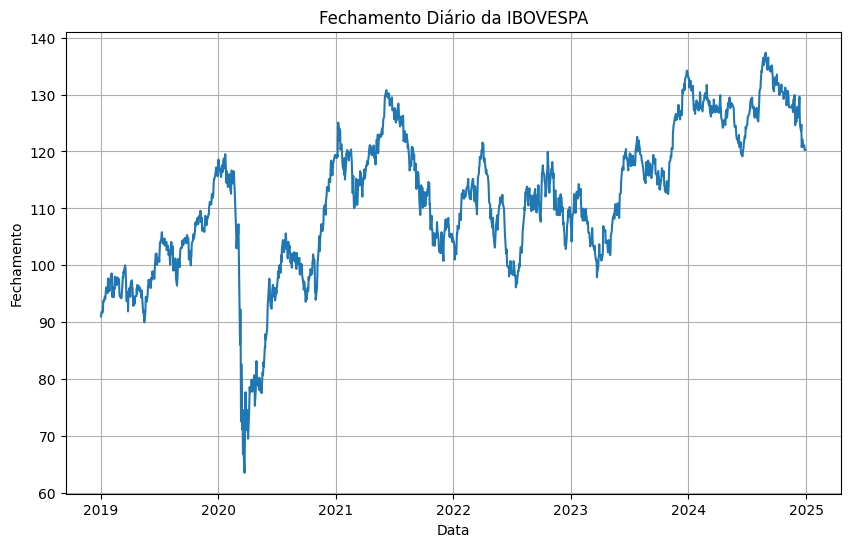

In [10]:
plt.figure(figsize=(10,6))
plt.plot(df['Data'], df['Fechamento'])
plt.title('Fechamento Diário da IBOVESPA')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.grid(True)
plt.show()

In [15]:
df['Vol.'] = df['Vol.'].astype(str)
df['Vol.'] = df['Vol.'].str.replace('M','').str.replace(',','.').str.replace('K','').astype(float)
df['Var%'] = df['Var%'].str.replace('%','').str.replace(',','.').astype(float)

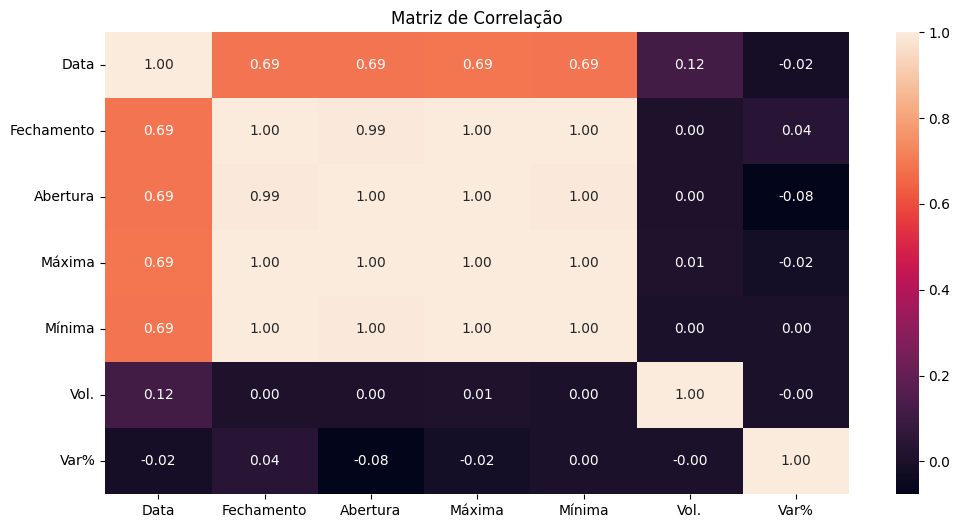

In [16]:
plt.figure(figsize=(12,6))
correlation = df.corr()
sns.heatmap( correlation, annot=True, fmt='.2f' )
plt.title('Matriz de Correlação')

plt.show()

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

<Figure size 1000x600 with 0 Axes>

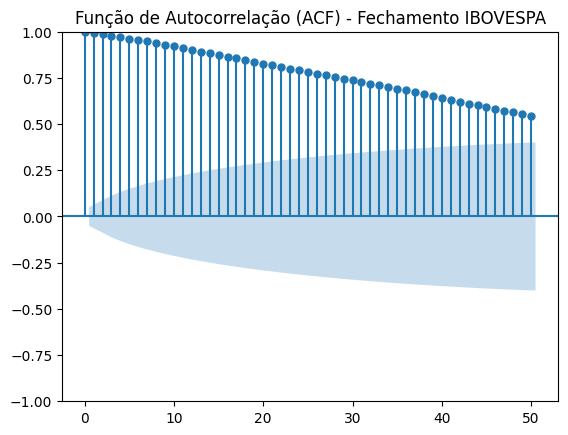

In [19]:
plt.figure(figsize=(10, 6))
plot_acf(df['Fechamento'], lags=50)
plt.title('Função de Autocorrelação (ACF) - Fechamento IBOVESPA')
plt.show()

In [22]:
result = adfuller(df['Fechamento'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.4030974937872
p-value: 0.14086407186459932


In [20]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

adf_test(df['Fechamento'])

ADF Statistic: -2.4030974937872
p-value: 0.14086407186459932
Critial Values:
   1%, -3.4347641828771405
Critial Values:
   5%, -2.863489576334964
Critial Values:
   10%, -2.5678079331921446


In [25]:
resultado = sm.tsa.adfuller(df['Fechamento'])

In [26]:
print("Estatística ADF:", resultado[0])
print("Valor p:", resultado[1])
print("Número de lags utilizados:", resultado[2])
print("Número de observações usadas para o teste:", resultado[3])
print("Valores críticos:")
for chave, valor in resultado[4].items():
        print(f'   {chave}: {valor}')
if resultado[1] < 0.05:
        print("Conclusão: A série é estacionária (rejeita-se a hipótese nula).")
else:
        print("Conclusão: A série não é estacionária (não se rejeita a hipótese nula).")

Estatística ADF: -2.4030974937872
Valor p: 0.14086407186459932
Número de lags utilizados: 8
Número de observações usadas para o teste: 1484
Valores críticos:
   1%: -3.4347641828771405
   5%: -2.863489576334964
   10%: -2.5678079331921446
Conclusão: A série não é estacionária (não se rejeita a hipótese nula).


In [40]:
result_diff = sm.tsa.adfuller(df['Fechamento_diff'].dropna())
print('ADF Statistic (Diferenciado):', result_diff[0])
print('p-value (Diferenciado):', result_diff[1])

ADF Statistic (Diferenciado): -11.914390692963682
p-value (Diferenciado): 5.205877550641877e-22


In [30]:
df['Fechamento_diff'] = df['Fechamento'].diff().dropna()
adf_test(df['Fechamento_diff'].dropna())


ADF Statistic: -11.914390692963682
p-value: 5.205877550641877e-22
Critial Values:
   1%, -3.4347641828771405
Critial Values:
   5%, -2.863489576334964
Critial Values:
   10%, -2.5678079331921446


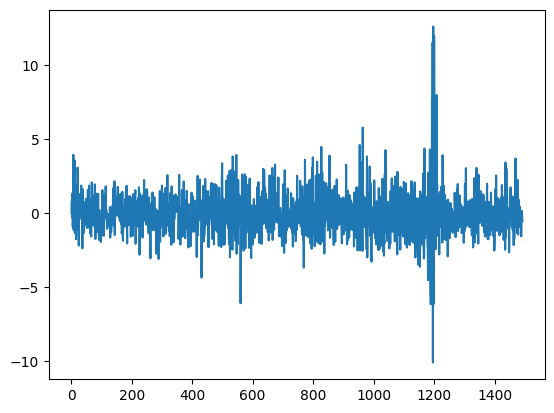

In [32]:
plt.plot(df.index, df.Fechamento_diff)

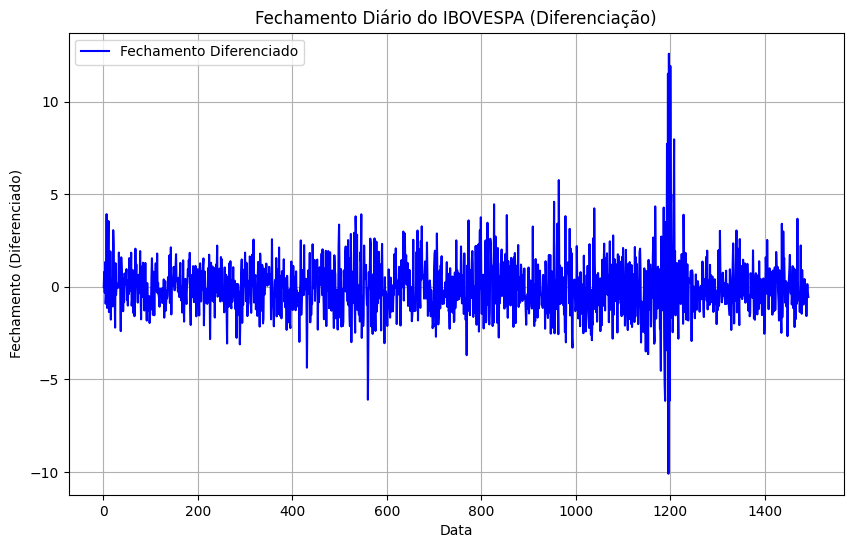

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Fechamento_diff'], label='Fechamento Diferenciado', color='blue')
plt.title('Fechamento Diário do IBOVESPA (Diferenciação)')
plt.xlabel('Data')
plt.ylabel('Fechamento (Diferenciado)')
plt.grid()
plt.legend()
plt.show()

In [41]:
from pmdarima import auto_arima

In [44]:
modelo_auto_arima = auto_arima(df['Fechamento'], seasonal=False, trace=True)
print(modelo_auto_arima.summary())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5495.594, Time=4.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5513.921, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5497.428, Time=0.11 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5499.087, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5512.165, Time=0.07 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5497.344, Time=0.78 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5495.010, Time=1.73 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5498.098, Time=0.49 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5497.034, Time=0.27 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5494.211, Time=1.44 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5496.782, Time=0.33 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=5496.180, Time=1.90 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5493.922, Time=2.45 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=5495.760, Time=5.77 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5493.208, Time=3.85 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5494.980, Time=3.54 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=5495.907, Time=7.20 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=5493.496, Time=4.42 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=5497.031, Time=2.93 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=5492.004, Time=8.10 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=5493.414, Time=6.40 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=8.97 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,5)(0,0,0)[0] intercept   : AIC=5495.432, Time=5.15 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=5495.275, Time=9.42 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,5)(0,0,0)[0] intercept   : AIC=5488.844, Time=8.35 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,5)(0,0,0)[0]             : AIC=5486.979, Time=5.41 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,5)(0,0,0)[0]             : AIC=inf, Time=4.69 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,4)(0,0,0)[0]             : AIC=5489.338, Time=6.19 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(0,0,0)[0]             : AIC=5489.959, Time=2.71 sec

Best model:  ARIMA(5,1,5)(0,0,0)[0]          
Total fit time: 107.880 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1493
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -2732.490
Date:                Tue, 14 Jan 2025   AIC                           5486.979
Time:                        19:56:19   BIC                           5545.366
Sample:                             0   HQIC                          5508.736
                               - 1493                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4408      0.117     -3.756      0.000      -0.67

In [57]:
previsoes = modelo_auto_arima.predict(n_periods=30)
print(previsoes)

1493    91.172998
1494    90.911750
1495    90.755181
1496    90.864658
1497    90.960608
1498    90.942337
1499    90.675081
1500    90.708176
1501    90.853111
1502    90.860332
1503    90.728410
1504    90.584000
1505    90.742990
1506    90.814233
1507    90.723146
1508    90.595542
1509    90.605293
1510    90.771521
1511    90.724786
1512    90.604995
1513    90.563940
1514    90.666089
1515    90.744485
1516    90.618020
1517    90.551368
1518    90.600703
1519    90.699248
1520    90.668101
1521    90.543865
1522    90.565447
dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


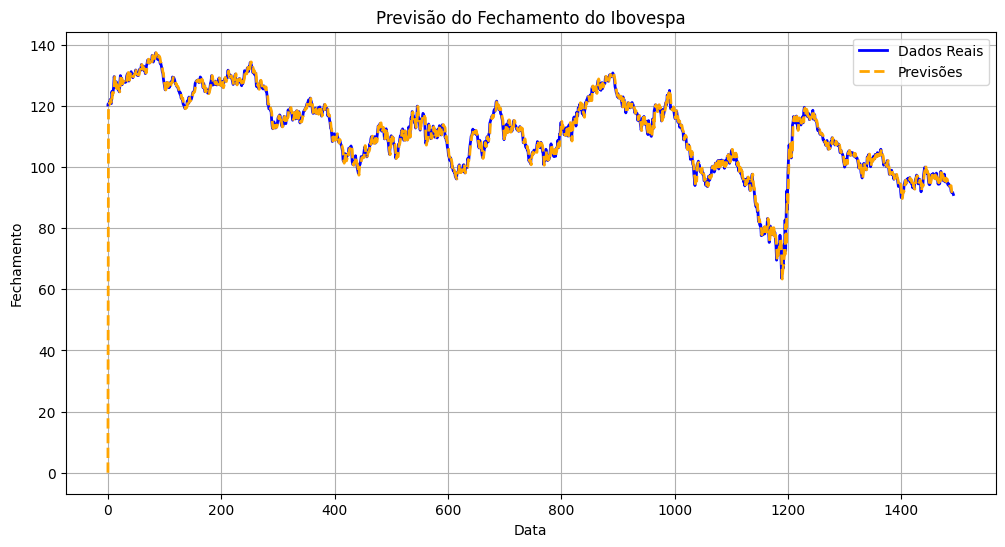

In [62]:
df['Previsões'] = modelo_auto_arima.predict_in_sample()
plt.figure(figsize=(12, 6))
plt.plot(df['Fechamento'], label='Dados Reais', color='blue', linestyle='-', linewidth=2)
plt.plot(df['Previsões'], label='Previsões', color='orange', linestyle='--', linewidth=2)
plt.title('Previsão do Fechamento do Ibovespa')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.grid(True)
plt.legend()

plt.show()

In [81]:
import matplotlib.dates as mdates

In [82]:
df_fechamento_previsao = df.copy()

In [87]:
print(df_fechamento_previsao.isnull().sum())

Data               30
Fechamento         30
Abertura           30
Máxima             30
Mínima             30
Vol.               30
Var%               30
Fechamento_diff    31
Previsões          30
dtype: int64


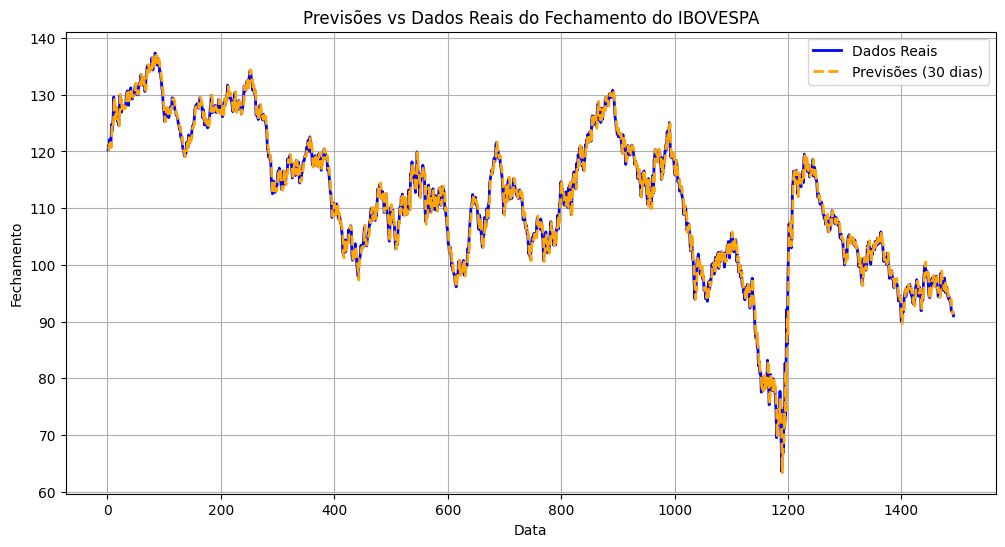

In [92]:
df_previsoes = pd.DataFrame(previsoes, index=novas_datas, columns=['Previsões'])

df_fechamento_previsao = pd.concat([df_fechamento_previsao, df_previsoes])
df_fechamento_previsao = df_fechamento_previsao.dropna()
plt.figure(figsize=(12, 6))
plt.plot(df_fechamento_previsao.index, df_fechamento_previsao['Fechamento'], label='Dados Reais', color='blue', linestyle='-', linewidth=2)
plt.plot(df_fechamento_previsao.index, df_fechamento_previsao['Previsões'], label='Previsões (30 dias)', color='orange', linestyle='--', linewidth=2)
plt.title('Previsões vs Dados Reais do Fechamento do IBOVESPA')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.grid(True)
plt.legend()
plt.show()

In [95]:
from sklearn.model_selection import train_test_split

In [67]:
modelo_auto_arima = auto_arima(df['Fechamento'], seasonal=True, m=7, trace=True, error_action='ignore', suppress_warnings=True)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=5479.350, Time=4.99 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=5513.921, Time=0.06 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5475.708, Time=0.58 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5477.181, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=5512.165, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=5497.428, Time=0.11 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=5477.591, Time=1.44 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=5477.546, Time=3.15 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=5475.563, Time=0.83 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=5477.550, Time=0.81 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=5479.348, Time=3.18 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=5492.186, Time=0.47 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,1)[7] intercept   : AIC=5475.360, Time=0.72 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=5497.034, Time=0.28 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=5477.346, Time=1.53 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,2)[7] intercept   : AIC=5477.350, Time=1.22 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=5475.504, Time=0.73 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,2)[7] intercept   : AIC=5479.100, Time=6.20 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,1)[7] intercept   : AIC=5475.184, Time=0.76 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[7] intercept   : AIC=5496.782, Time=0.34 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,1)[7] intercept   : AIC=5477.183, Time=2.02 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,2)[7] intercept   : AIC=5477.183, Time=1.18 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,0)[7] intercept   : AIC=5475.414, Time=0.93 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,2)[7] intercept   : AIC=5478.971, Time=8.12 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,1)[7] intercept   : AIC=5476.571, Time=1.02 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,1)[7] intercept   : AIC=5476.280, Time=2.20 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,1)[7] intercept   : AIC=5476.340, Time=5.95 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,1)[7] intercept   : AIC=5478.266, Time=5.89 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,1)[7]             : AIC=5473.390, Time=0.42 sec
 ARIMA(3,1,0)(0,0,0)[7]             : AIC=5495.041, Time=0.14 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,1)[7]             : AIC=5475.388, Time=0.91 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,2)[7]             : AIC=5475.389, Time=0.61 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,0)[7]             : AIC=5473.614, Time=0.36 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,2)[7]             : AIC=5477.369, Time=0.82 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,1)[7]             : AIC=5473.582, Time=0.37 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,1)[7]             : AIC=5474.785, Time=0.43 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,1)[7]             : AIC=5474.492, Time=0.93 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,1)[7]             : AIC=5474.549, Time=1.96 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,1)[7]             : AIC=5476.479, Time=1.40 sec

Best model:  ARIMA(3,1,0)(0,0,1)[7]          
Total fit time: 63.838 seconds


In [ ]:
ultimo_dia = df.index[-1]
novas_datas = pd.date_range(start=ultimo_dia, periods=31, freq='B')[1:]

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [48]:
y_true = df['Fechamento']
y_pred = modelo_auto_arima.predict_in_sample()

In [50]:
mae = mean_absolute_error(y_true, y_pred)
print('MAE:', mae)
mse = mean_squared_error(y_true, y_pred)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('MAPE:', mape)
r2 = r2_score(y_true, y_pred)
print('R²:', r2)

MAE: 1.1782945684379948
MSE: 11.970532204433134
RMSE: 3.459845690841303
MAPE: 1.0954109535797651
R²: 0.9272252758916605


In [51]:
erro_aceitavel = 0.05

acuracia = np.mean(np.abs((y_true - y_pred) / y_true) <= erro_aceitavel) * 100
print('Acurácia:', acuracia)

Acurácia: 98.86135298057603
